In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
epsi0 =  8.8541878128e-12
mu0 = 1.25663706212e-6
c0 = 1/np.sqrt(epsi0*mu0)
imp0 = np.sqrt(mu0/epsi0)

jmax = 500
nmax = 2000
jsource = 100

In [37]:
Ex = np.zeros(jmax)
Hz = np.zeros(jmax)
Ex_prev = np.zeros(jmax)
Hz_prev = np.zeros(jmax)

In [38]:
lambda_min = 350e-9
dx = lambda_min/20 
dt = dx/c0
eps = epsi0

In [39]:
def Source_Function(t):
    tau = 300
    t0 = tau*3
    lambda_0 = 550e-9
    w0 = 2*np.pi*c0/lambda_0
    return np.exp(-(t-t0)**2/tau**2)*np.sin(w0*t*dt)

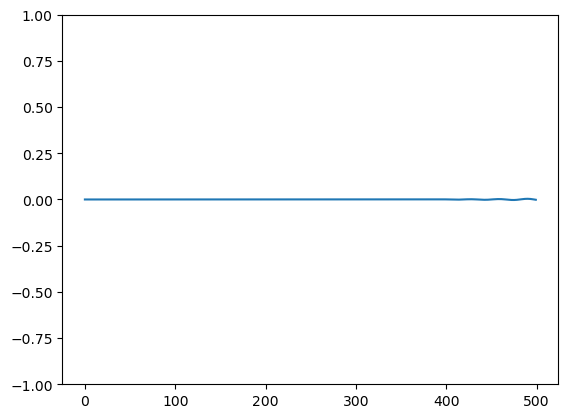

In [44]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylim([-1,1])
line, = ax.plot(Ex)

In [ ]:
def animate(i):
    n=i
    #Update magnetic field boudaries 
    Hz[jmax-1] = Hz_prev[jmax-2]
    #Update magnetic field
    for j in range(jmax-1):
        Hz[ ]= Hz_prev[j]+ dt/(dx*mu0) * (Ex[j+1]-Ex[j])
        Hz_prev[j]=Hz[j]
    
    #Magnetic field
    Hz[jsource-1] -= Source_Function(n)/imp0
    Hz_prev[jsource-1] = Hz[jsource-1]

    #Update electric field boudaries 
    Ex[0] = Ex_prev[1]
    #Update electric field
    for j in range(1,jmax):
        Ex[j]= Ex_prev[j]+ dt/(dx*eps) * (Hz[j]-Hz[j-1])
        Ex_prev[j]=Ex[j]

        
    Ex[jsource] += Source_Function(n+1)
    Ex_prev[jsource]=Ex[jsource]
    
    if n%10 == 0:
        
    line.set_ydata(Ex)

    return line,


In [49]:
anim = FuncAnimation(fig, animate, frames = nmax, interval = 10)

plt.anim()


AttributeError: module 'matplotlib.pyplot' has no attribute 'anim'

5.837371665967533e-17